In [139]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
options = webdriver.ChromeOptions()
# options.add_argument('--headless')
driver = webdriver.Chrome(options=options)

dan = pd.DataFrame(columns=['product', 'price', 'rating', 'recall', 'instalment', 'instalment_price', 'instalment_time'])

In [169]:
try:
    driver.get('https://kaspi.kz/shop/c/notebooks/')
    wait = WebDriverWait(driver, 10)
    driver.implicitly_wait(2)
    # Ожидаем, пока появится элемент, чтобы кликнуть на него
    city_to_click = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="dialogService"]/div/div[1]/div[1]/div/ul[1]/li[10]/a')))
    city_to_click.click()
    driver.implicitly_wait(2)
    category_to_click = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="page"]/div[2]/nav/div/ul/li[5]/a/span')))
    category_to_click.click()
    driver.implicitly_wait(2)
    subcategory_click = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="scroll-to"]/div[1]/div[1]/div/ul/li/ul/li[3]/span[1]')))
    subcategory_click.click()
    driver.implicitly_wait(2)
    
    select_product_click =  wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="scroll-to"]/div[1]/div[1]/div/ul/li/ul/li/ul/li[1]/span[1]')))
    select_product_click.click()
    driver.implicitly_wait(2)
    
#     products = wait.until(
#                 EC.presence_of_all_elements_located((By.CLASS_NAME, 'item-card__info'))
#             )
    soup = bs(driver.page_source, 'html.parser')
    
    page_value = 1
#############################################
    while True:
        
        wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'pagination')))
        pagination = driver.find_element(By.CLASS_NAME, 'pagination')
        pagination_elements = pagination.find_elements(By.CLASS_NAME, 'pagination__el')

        try:
            wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'item-card__info')))
            driver.implicitly_wait(60)
            requiredHtml = driver.page_source
            soup = bs(requiredHtml, 'html.parser')

            for cur in soup.find_all('div', class_='item-card__info'):
                now_rating = re.findall("[0-9]+", str(cur.select('span')[0]))
                now_rating = int(now_rating[0])
                now_price = cur.select('.item-card__prices-price')[0].getText().strip()
                now_price = int("".join(now_price[:-1].split()))
                now_recall = cur.select('.item-card__rating')[0].getText().strip()
                instalment = cur.select_one('.item-card__instalment .item-card__prices-title').get_text(strip=True)
                instalment_price = cur.select_one('.item-card__instalment .item-card__prices-price').get_text(strip=True)
                instalment_time = cur.select_one('.item-card__instalment .item-card__add-info').get_text(strip=True)
                now_product = cur.select('a')[0].getText().strip()
                dan.loc[len(dan.index)] = [now_product, now_price, now_rating, now_recall, instalment, instalment_price, instalment_time]
            
            page_value += 1
            print('Done: ' + str(page_value))
            next_button = pagination_elements[-1]
            if 'disabled' in next_button.get_attribute('class'):
                break
            next_button.click()
            driver.implicitly_wait(60)
        except:
            break

except Exception as e:
    print('Error: ' + str(e))
    
finally:
    driver.quit()

Done: 2
Done: 3
Done: 4
Done: 5


In [176]:
try:

    while True:
        
        wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'pagination')))
        pagination = driver.find_element(By.CLASS_NAME, 'pagination')
        pagination_elements = pagination.find_elements(By.CLASS_NAME, 'pagination__el')

        try:
            wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'item-card__info')))
            driver.implicitly_wait(60)
            requiredHtml = driver.page_source
            soup = bs(requiredHtml, 'html.parser')

            for cur in soup.find_all('div', class_='item-card__info'):
                now_rating = re.findall("[0-9]+", str(cur.select('span')[0]))
                now_rating = int(now_rating[0])
                now_price = cur.select('.item-card__prices-price')[0].getText().strip()
                now_price = int("".join(now_price[:-1].split()))
                now_recall = cur.select('.item-card__rating')[0].getText().strip()
                instalment = cur.select_one('.item-card__instalment .item-card__prices-title').get_text(strip=True)
                instalment_price = cur.select_one('.item-card__instalment .item-card__prices-price').get_text(strip=True)
                instalment_time = cur.select_one('.item-card__instalment .item-card__add-info').get_text(strip=True)
                now_product = cur.select('a')[0].getText().strip()
                dan.loc[len(dan.index)] = [now_product, now_price, now_rating, now_recall, instalment, instalment_price, instalment_time]
            
            page_value += 1
            print('Done: ' + str(page_value))
            next_button = pagination_elements[-1]
            if 'disabled' in next_button.get_attribute('class'):
                break
            next_button.click()
            driver.implicitly_wait(60)
        except:
            break

except Exception as e:
    print('Error: ' + str(e))

df = dan

Done: 93


In [205]:
df.replace('', pd.NA, inplace=True)
df.to_csv('./Data/product_data_almaty.csv', sep=';', index=False, encoding='utf-8')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1103
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product           1104 non-null   object
 1   price             1104 non-null   int64 
 2   rating            1104 non-null   int64 
 3   recall            696 non-null    object
 4   instalment        1104 non-null   object
 5   instalment_price  1104 non-null   object
 6   instalment_time   1104 non-null   object
dtypes: int64(2), object(5)
memory usage: 69.0+ KB


In [199]:
df.columns

Index(['product', 'price', 'rating', 'recall', 'instalment',
       'instalment_price', 'instalment_time'],
      dtype='object')

In [187]:
df.isna().sum()

product               0
price                 0
rating                0
recall              408
instalment            0
instalment_price      0
instalment_time       0
dtype: int64

In [200]:
df[['price', 'rating']].describe()

,price,rating
count,1.104000e+03,1104.000000
mean,5.037540e+05,6.636775
std,3.608384e+05,4.509419
min,2.290000e+03,0.000000
25%,2.599900e+05,0.000000
50%,4.200000e+05,10.000000
75%,5.999900e+05,10.000000
max,2.329990e+06,10.000000


In [201]:
df[['product', 'recall', 'instalment',
       'instalment_price', 'instalment_time']].describe()

,product,recall,instalment,instalment_price,instalment_time
count,1104,696,1104,1104,1104
unique,857,59,2,607,3
top,Lenovo IdeaPad 3 15ALC6 82KU009MRK серый,(1 отзыв),В кредит,25 306 ₸,x24
freq,4,128,1029,20,1026


In [203]:
df.head(2)

,product,price,rating,recall,instalment,instalment_price,instalment_time
0,Creative Bracket UN-60,2290,9,(221 отзыв),В рассрочку,764 ₸,x3
1,Lenovo IdeaPad 3 15IGL05 81WQ00JBRK серый,129990,9,(36 отзывов),В кредит,8 225 ₸,x24


In [215]:
df['new_recall'] = df['recall'].str.extract('(\d+)').fillna(0).astype(int)

In [216]:
df['new_instalment'] = df['instalment'].apply(lambda x: 1 if x == 'В кредит' else 0)
df['new_instalment_price'] = df['instalment_price'].str.replace('₸', '').str.replace(' ', '').astype(int)
df['new_instalment_time'] = df['instalment_time'].str.extract('(\d+)').astype(int)


In [217]:
df.head()

,product,price,rating,recall,instalment,instalment_price,instalment_time,new_recall,new_instalment,new_instalment_price,new_instalment_time
0,Creative Bracket UN-60,2290,9,(221 отзыв),В рассрочку,764 ₸,x3,221,0,764,3
1,Lenovo IdeaPad 3 15IGL05 81WQ00JBRK серый,129990,9,(36 отзывов),В кредит,8 225 ₸,x24,36,1,8225,24
2,Apple MacBook Air 13 MGN63 серый,448479,10,(388 отзывов),В рассрочку,37 374 ₸,x12,388,0,37374,12
3,Lenovo IdeaPad Gaming 3 16IAH7 82SA00FARK темн...,422899,10,(25 отзывов),В кредит,26 756 ₸,x24,25,1,26756,24
4,Lenovo IdeaPad 1 15ADA7 82R10055RK серый,196410,10,(17 отзывов),В кредит,12 427 ₸,x24,17,1,12427,24


In [218]:
df.columns

Index(['product', 'price', 'rating', 'recall', 'instalment',
       'instalment_price', 'instalment_time', 'new_recall', 'new_instalment',
       'new_instalment_price', 'new_instalment_time'],
      dtype='object')

In [220]:
df[['price', 'rating', 'new_recall', 'new_instalment',
       'new_instalment_price', 'new_instalment_time']].describe()

,price,rating,new_recall,new_instalment,new_instalment_price,new_instalment_time
count,1.104000e+03,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,5.037540e+05,6.636775,8.169384,0.932065,33088.119565,23.103261
std,3.608384e+05,4.509419,25.500846,0.251748,25349.276388,3.315699
min,2.290000e+03,0.000000,0.000000,0.000000,764.000000,3.000000
25%,2.599900e+05,0.000000,0.000000,1.000000,16449.000000,24.000000
50%,4.200000e+05,10.000000,2.000000,1.000000,26572.000000,24.000000
75%,5.999900e+05,10.000000,8.000000,1.000000,38053.250000,24.000000
max,2.329990e+06,10.000000,388.000000,1.000000,178479.000000,24.000000


In [222]:
X = df[['price', 'new_recall', 'new_instalment', 'new_instalment_price', 'new_instalment_time']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 18.821316657205983


In [223]:
X = df[['price', 'new_recall', 'new_instalment', 'new_instalment_price', 'new_instalment_time']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 5.203381473767461


In [233]:
X = df[['price', 'new_recall', 'new_instalment', 'new_instalment_price', 'new_instalment_time']]
y = df['rating']
def train_and_predict_rating(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, y_pred

mse_result, y_pred_result = train_and_predict_rating(X, y)

print(f"Среднеквадратичная ошибка: {mse_result}")
print("Предсказанный рейтинг:", y_pred_result)

Среднеквадратичная ошибка: 5.203381473767461
Предсказанный рейтинг: [ 9.95583732  0.90571247  9.662328    0.90571247  0.77575934  9.86319987
  9.71406156  9.54008249  0.77575934  9.61920088  8.83936127  9.56026877
  9.43596466  1.07482259  9.64572723  5.45076931  0.69670309  1.10269138
  0.29539621  9.54008249  0.77575934 10.07527154  2.51222166  0.9387072
  5.45076931  3.99218945  9.8066153   9.61920088  0.77575934  9.63938716
  5.55457548  9.5293241   1.10269138  0.77575934  0.9387072   9.45495734
  9.5661996   8.99336996  8.91301364  9.54008249  9.56060208  9.4710125
  9.62216042  0.48133195  9.89207376  3.49182734  9.88918557  0.84127435
  9.5293241   0.42574609  9.56026877  0.69670309  9.64572723  9.05751075
  9.15344273  9.89207376  1.91264581  0.69670309  9.24766791  0.90571247
  9.8637685   9.40471807  0.91234622 10.04129579  9.72484562  0.76066864
  3.74379654  5.19029936  9.6407138   9.48724428  9.68441251  9.48724428
  3.91563371  9.38294808  9.40471807  9.61920088  0.775759

In [236]:
data = {
    'price': [2000, 1500, 3000, 2500, 1800],
    'new_recall': [100, 50, 200, 150, 80],
    'new_instalment': [1, 0, 1, 0, 1],
    'new_instalment_price': [800, 400, 1000, 600, 900],
    'new_instalment_time': [3, 6, 4, 8, 5],
    'rating': [8, 7, 9, 8, 7]
}

df_synthesized = pd.DataFrame(data)

def train_and_predict_rating(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('X train values: \n', X_train)
    print('X test values: \n', X_test)
    print('y train values: \n', y_train)
    print('y test values: \n', y_test)
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, y_pred

X = df_synthesized[['price', 'new_recall', 'new_instalment', 'new_instalment_price', 'new_instalment_time']]
y = df_synthesized['rating']

mse_result, y_pred_result = train_and_predict_rating(X, y)

print(f"Среднеквадратичная ошибка: {mse_result}")
print("Предсказанный рейтинг:", y_pred_result)


X train values: 
    price  new_recall  new_instalment  new_instalment_price  \
4   1800          80               1                   900   
2   3000         200               1                  1000   
0   2000         100               1                   800   
3   2500         150               0                   600   

   new_instalment_time  
4                    5  
2                    4  
0                    3  
3                    8  
X test values: 
    price  new_recall  new_instalment  new_instalment_price  \
1   1500          50               0                   400   

   new_instalment_time  
1                    6  
y train values: 
 4    7
2    9
0    8
3    8
Name: rating, dtype: int64
y test values: 
 1    7
Name: rating, dtype: int64
Среднеквадратичная ошибка: 0.017138672162954286
Предсказанный рейтинг: [7.13091475]


In [229]:
df[['price', 'new_recall', 'new_instalment', 'new_instalment_price', 'new_instalment_time']].loc[0]

price                   2290
new_recall               221
new_instalment             0
new_instalment_price     764
new_instalment_time        3
Name: 0, dtype: int64

In [228]:
df.loc[0]

product                 Creative Bracket UN-60
price                                     2290
rating                                       9
recall                             (221 отзыв)
instalment                         В рассрочку
instalment_price                         764 ₸
instalment_time                             x3
new_recall                                 221
new_instalment                               0
new_instalment_price                       764
new_instalment_time                          3
Name: 0, dtype: object

In [237]:
df_cor = df[['price', 'new_recall', 'new_instalment', 'new_instalment_price', 'new_instalment_time', 'rating']]

In [239]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


3.7.1
0.12.2


C:\Users\almat\AppData\Local\Temp\ipykernel_20572\1183295007.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


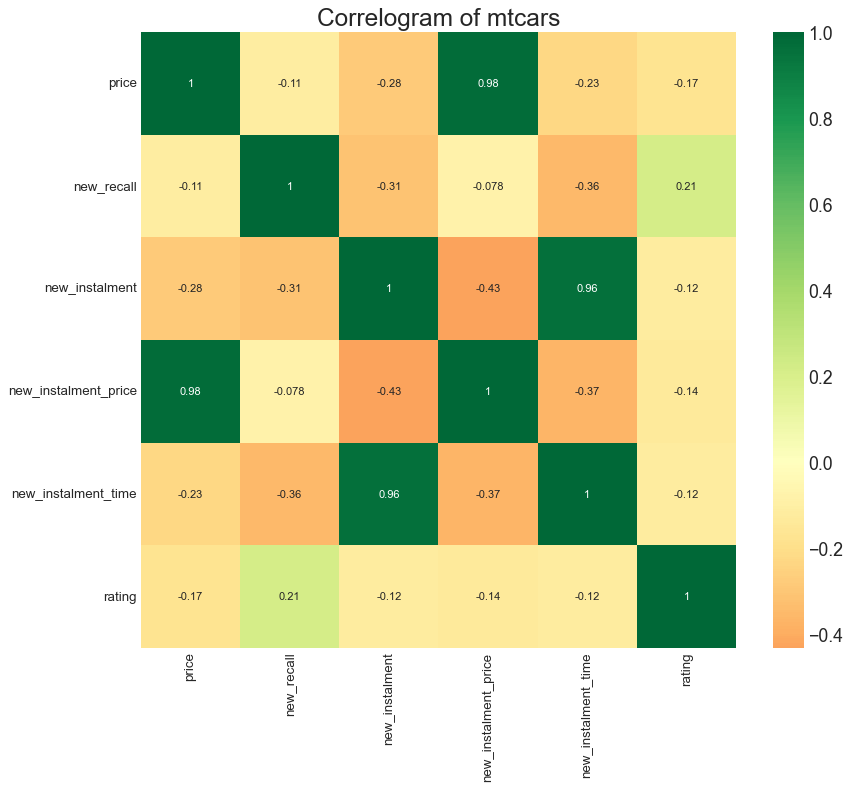

In [240]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_cor.corr(), xticklabels=df_cor.corr().columns, \
            yticklabels=df_cor.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [253]:
df_select.new_recall.max()

388

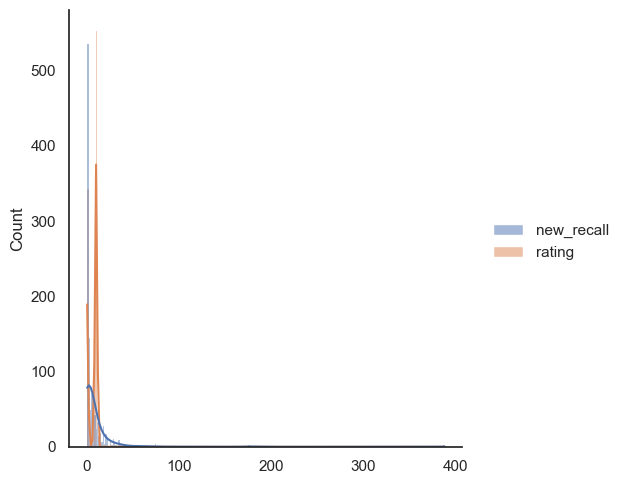

In [257]:
df_select = df_cor[['new_recall', 'rating']]

sns.set(style='white')
sns.displot(df_select, kde=True, color="m")

In [266]:
df_select.rating.value_counts().sum()-343

761

In [268]:
df_select.new_recall.value_counts().sum()

696

In [261]:
bins = [0, 10, 20, 30, 50, 100, 500]

categories_recall = ['0-10', '11-20', '21-30', '31-50', '51-100', '101-500']
categories_rating = [i for i in range(11)]

df_select['recall_group'] = pd.cut(df_select['new_recall'], bins=bins, labels=categories, include_lowest=True)
df_select['rating_group'] = pd.cut(df_select['rating'], bins=bins, labels=categories, include_lowest=True)

group_counts = df_select['recall_group'].value_counts()
print(group_counts)

0-10       893
11-20      109
21-30       49
31-50       28
51-100      15
101-500     10
Name: recall_group, dtype: int64


C:\Users\almat\AppData\Local\Temp\ipykernel_20572\1187149013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['recall_group'] = pd.cut(df_select['new_recall'], bins=bins, labels=categories, include_lowest=True)


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1103
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               1104 non-null   object
 1   price                 1104 non-null   int64 
 2   rating                1104 non-null   int64 
 3   recall                696 non-null    object
 4   instalment            1104 non-null   object
 5   instalment_price      1104 non-null   object
 6   instalment_time       1104 non-null   object
 7   new_recall            1104 non-null   int32 
 8   new_instalment        1104 non-null   int64 
 9   new_instalment_price  1104 non-null   int32 
 10  new_instalment_time   1104 non-null   int32 
dtypes: int32(3), int64(3), object(5)
memory usage: 122.9+ KB


In [280]:
df.query('new_recall== 0 & rating != 0') # Почистить данные от этих значений

,product,price,rating,recall,instalment,instalment_price,instalment_time,new_recall,new_instalment,new_instalment_price,new_instalment_time
85,HP 15s-fq5033ci 725V9EA серебристый,259888,10,<NA>,В кредит,16 443 ₸,x24,0,1,16443,24
125,Acer Extensa 15 EX215-31-C1JG NX.EFTER.00F черный,147700,10,<NA>,В кредит,9 345 ₸,x24,0,1,9345,24
137,Acer Extensa 15 EX215-31-C1JG NX.EFTER.00F черный,147700,10,<NA>,В кредит,9 345 ₸,x24,0,1,9345,24
184,Lenovo IdeaPad 3 15ADA6 82KR00BRRK серый,146989,10,<NA>,В кредит,9 300 ₸,x24,0,1,9300,24
205,Aсer Aspire A315-56-53DR NX.HS5ER.012 черный,264695,10,<NA>,В кредит,16 747 ₸,x24,0,1,16747,24
...,...,...,...,...,...,...,...,...,...,...,...
1055,Lenovo TP T590 20N4004DRT черный,590000,10,<NA>,В кредит,37 328 ₸,x24,0,1,37328,24
1086,HP Omen 17-ck1010ci 6K318EA черный,1904590,10,<NA>,В кредит,120 497 ₸,x24,0,1,120497,24
1087,Lenovo TP T590 20N4004DRT черный,590000,10,<NA>,В кредит,37 328 ₸,x24,0,1,37328,24
1094,Acer Extensa 15 EX215-54-36D0 NX.EGJER.00H черный,280990,10,<NA>,В кредит,17 778 ₸,x24,0,1,17778,24


In [1]:
pip freeze > requirements1.txt

Note: you may need to restart the kernel to use updated packages.
